# [LAB 06] 7. 데이터 간 관계 시각화 (1) - Scatter Plot (산점도 그래프)

## 데이터 관계 시각화 그래프 4종:

| 그래프 | 주요 목적 | 회귀선‼️(Regression line) | 그룹비교 | 사용상황 |
| --- | --- | --- | --- | --- |
| Scatterplot | 기본 관계 파악 | X | X | 기초탐색 |
| Regplot | 선형 경향 + 신뢰구간 | O | X | 관계 해석 강화 |
| Lmplot | 그룹별 선형관계 비교 | O | O | 비교분석(성별/지역 등) |
| Pairplot | 전체 변수 관계 한눈에 보기 | 변수쌍마다 단순 산점도 | 제한적(hue 지원) | EDA초기 전체 스캔 |

- 데이터분석은 '데이터 간 관계를 파악하는게 중요함' 
- 인과관계를 따라잡기에는 머신러닝 알고리즘의 발전속도가 미친듯이 더 앞서나가서
- Replot = Scatterplot + 회귀선
- Lmplot = Scatterplot + Regplot

## Scatter Plot의 이해

- 두 연속형 변수의 관계를 시각화 하는 가장 기본적인 그래프
- 두 연속형 변수간의 영향력 (**분포, 상관 경향**)을 점(point)로 표시
- 패던(직선, 곡선 등), 군집형태, 이상치를 쉽게 파악 가능
- 통계적 모델은 포함 x, **관계의 형태를 "그려만 준다"**

### 1. Scatter plot 유형: 

- proportional, improportional, linear, nonlinear

### 2. Scatter Plot 해석법:
- 상관관계를 비교, 분석하는 것이 목적
  - 상관관계: 마커들의 뭉침 정도 
    - 뭉침 정도가 높을수록 x, y간 관련성 ↑, 상관관계 ↑
    - 추론통계의 상관분석에서 더 디테일 다룰 예정
- (상관지수(점(마커)의 모임 정도)를 찾아내는 것은 EDA 과정에서 함)
- 목표: 추세선 (회귀선 = 회귀분석 모형) 찾고 by NumPy❗(=find regression model)
  - 추세선 y = ax + b에서 
    - a('다중치' or 기울기 or 계수), b('편향' or 상수항 or 절편)값 찾는것❗
  - (cf. Scikit Learn은 퓨처엔지니어링과 머신러닝에서 많이 쓰이는 라이브러리)
  - -> 회귀분석 식 최적화 과정으로 구한 a,b 값을 적용해서 해당 식으로 예측 하는 것이 목표
- 데이터분석에서 성능 뜻: 얼마나 실제 값과 비슷한 값을 예측하느냐

#### **linear regression model(회귀선)** 은 단순하게 **그래프 그리기에 lineplot 추가**하는거임 (검증(confidential level)은 또 다른 문제)

## #01. 준비작업

### 1. 패키지 참조

In [1]:
# 오늘 예제에서는 numpy가 제일 중요함! 
    # ∵ 회귀분석 식을 찾고 해당 식으로 예측 하기 위함

from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

### 2. 그래프 초기화

In [5]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기

In [6]:
origin = load_data('icecream')
origin.head()

[data] https://data.hossam.kr/data/lab06/icecream.xlsx
[desc] 기온과 아이스크림 판매량을 기록한 가상의 데이터 (메타데이터,인덱스 없음)
[!] Cannot read metadata


,기온,판매량
0,23,431
1,36,593
2,30,512
3,25,474
4,26,476


## #02. Scatter Plot 시각화
> hue 파라미터로 데이터 범주 구별이 가능함

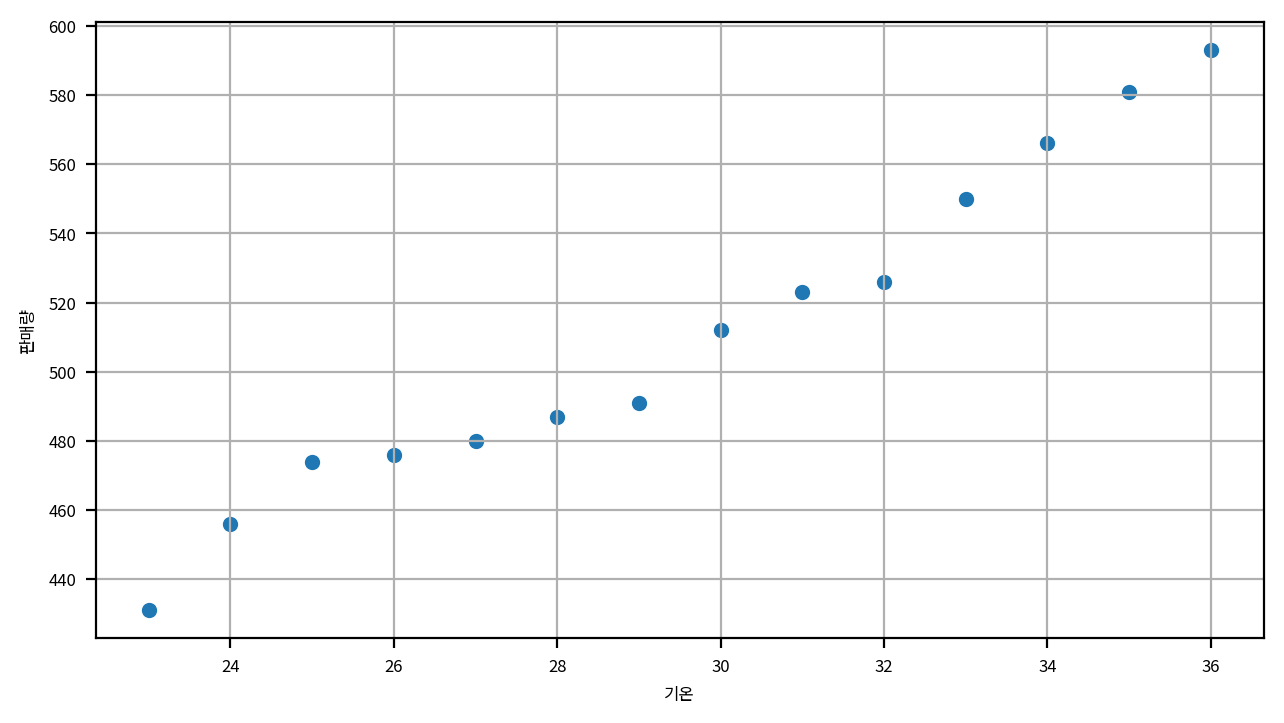

In [9]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) Scatter Plot 그래프 그리기: seaborn 사용
sb.scatterplot(data = origin, x = '기온', y = '판매량')

# 3) 그래프 꾸미기: 
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

 -> 알 수 있는 사실:
 - 기온에 따른 아이스크림 판매량을 산점도 그래프로 확인한 결과 기온이 상승할 수록 아이스크림 판매량도 증가하는 추세를 보임이 확인된다.

## #03. 추세선(회귀선) 그리기

- 주어진 데이터의 일반적인 경향 또는 패턴을 나타내는 선
- 추세선은 주로 선형 회귀 분석을 통해 계산되며, 이를 통해 데이터 간 관계 파악 및 예측모델 개발에 도움을 줌
- 추세선 그리기 위해서는 일반적으로 scipy 또는 sklearn 패키지를 참조 -> 선형회귀 모델 구현 -> 회귀식 도출 과정 필요
- 그러나 간단한 선형회귀는 numpy로도 분석 모델 도출 가능함

### 1. 기울기(가중치, 계수)와 편향(절편, 상수항) 구하기

```
계수, 상수항 = np.polyfit(x, y, 차수)
```

사용단어:
  - in 통계학: 가중치(=기울기) / 편향(=절편)
  - -> in numpy: 계수 / 상수항

In [11]:
z = np.polyfit(origin['기온'], origin['판매량'], 1)
print("상수항:", z[0])
print("계수:", z[0])

상수항: 11.397802197802186
계수: 11.397802197802186


### 2. 회귀 분석 모형

상수항과 계수를 이용하여 y = ax + b에 해당하는 방정식을 확인한다:

In [12]:
expr = "y = %0.1f * x + %0.1f" % (z[0], z[1])
expr

'y = 11.4 * x + 174.2'

### 3. 분석 모형 객체 생성

y = ax + b에 해당하는 방정식 객체를 생성한다:

In [13]:
f = np.poly1d(z)
f

poly1d([ 11.3978022 , 174.19340659])

### 4. 분석모형을 활용한 판매량 예시

방정식 f(x)에 x 값을 전달하면 그에 대한 결과를 확인할 수 있다:

In [15]:
x = 40

print("기온이 %d일 경우 아이스크림의 판매량은 %f로 예상됩니다." % (x, f(x)))

기온이 40일 경우 아이스크림의 판매량은 630.105495로 예상됩니다.


### 5. 전체 기온에 대한 예측 판매량 확인:

In [16]:
x = origin['기온']
y = f(x)
y

array([436.34285714, 584.51428571, 516.12747253, 459.13846154,
       470.53626374, 527.52527473, 504.72967033, 538.92307692,
       550.32087912, 447.74065934, 561.71868132, 573.11648352,
       481.93406593, 493.33186813])

### 6. 추세선을 포함하는 산점도 그래프

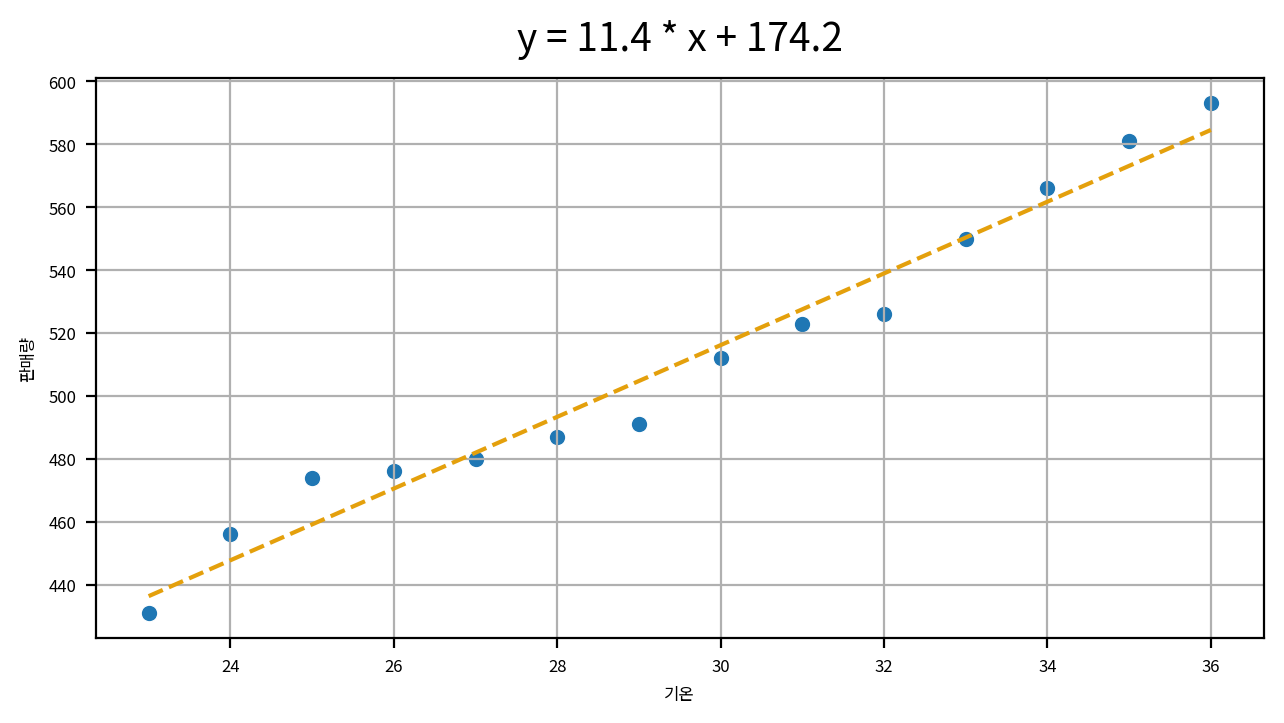

In [18]:
# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2-1) Scatter Plot 그래프 그리기: seaborn 사용
sb.scatterplot(data = origin, x = '기온', y = '판매량')

# 2-2) Line Plot 그리기:
sb.lineplot(x = x, y = y, color = '#e4a00c', linestyle = "--")

# 3) 그래프 꾸미기: 
ax.set_title(expr, fontsize = 14, pad = 10)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료